In [62]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [5]:
def nothing(x):
    pass

cap = cv2.VideoCapture(0)
cv2.namedWindow('Tracking')
cv2.createTrackbar('LH', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LS', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('LV', 'Tracking', 0, 255, nothing)
cv2.createTrackbar('UH', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('US', 'Tracking', 255, 255, nothing)
cv2.createTrackbar('UV', 'Tracking', 255, 255, nothing)

while True:
    # img = cv2.imread('smarties.jpg')
    _, img = cap.read()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    l_b = np.array([l_h, l_s, l_v,])
    u_b = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, l_b, u_b)
    res = cv2.bitwise_and(img, img, mask=mask)
    
    cv2.imshow('smarties', res)
    #cv2.imshow('smarties', img)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Thresholding

In [12]:
grad = cv2.imread('gradient.jpg', 0)

_, th1 = cv2.threshold(grad, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(grad, 127, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(grad, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(grad, 127, 255, cv2.THRESH_TOZERO)

cv2.imshow('gradient', grad)
cv2.imshow('th1', th1)
cv2.imshow('th2', th2)
cv2.imshow('th3', th3)
cv2.imshow('th4', th4)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
sudo = cv2.imread('sudoku.jpg', 0)

_, th1 = cv2.threshold(sudo, 100, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(sudo, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(sudo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 41, 8)
cv2.imshow('sudoku', th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Dilation and Erosion

In [23]:
img = cv2.imread('smarties.jpg', 0)

_, th1 = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(th1, kernel, iterations=2)
erosion = cv2.erode(th1, kernel, iterations=1)

cv2.imshow('Image', th1)
cv2.imshow('Dilation', dilation)
cv2.imshow('Erosion', erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Smoothing and bluring

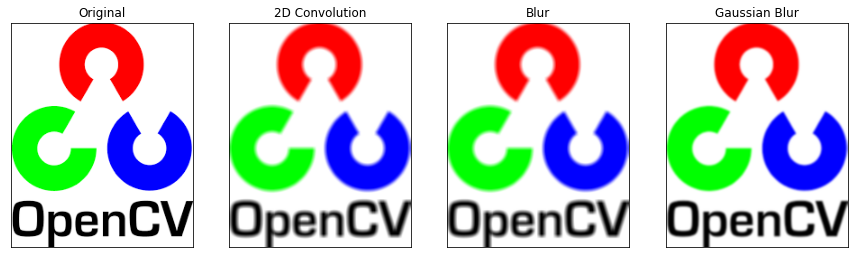

In [23]:
logo = cv2.imread('opencv-logo.png')
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

kernel = np.ones([5, 5], dtype=np.float32) / 25
dst = cv2.filter2D(logo, -1, kernel)
blur = cv2.blur(logo, (5, 5))
gblur = cv2.GaussianBlur(logo, (5,5), 0)

# for salt and pepper noise
median_blur = cv2.medianBlur(logo, 5)
bilerat_filter = cv2.bilateralFilter(logo, 9, 75, 75)

images = [logo, dst]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].set_title('Original')
ax[0].imshow(logo)
ax[1].set_title('2D Convolution')
ax[1].imshow(dst)
ax[2].set_title('Blur')
ax[2].imshow(blur)
ax[3].imshow(gblur)
ax[3].set_title('Gaussian Blur')

for a in ax:
    a.set_xticks([])
    a.set_yticks([]);

# Image Gradients

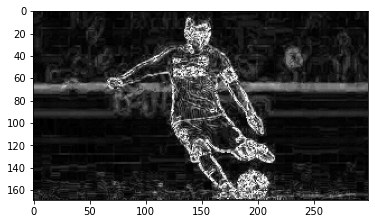

In [47]:
messi = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)
#messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
lap = cv2.Laplacian(messi, cv2.CV_64F, ksize=3)
lap = np.uint8(np.abs(lap))

sobelX = cv2.Sobel(messi, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(messi, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.abs(sobelX))
sobelY = np.uint8(np.abs(sobelY))
sobel_both = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobel_both, cmap='gray')

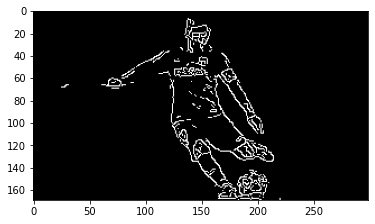

In [53]:
messi = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(messi, 150, 200)

plt.imshow(canny, cmap='gray')

In [65]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
lr = cv2.pyrDown(lena)
ur = cv2.pyrUp(lena)

cv2.imshow('lena', lena)
cv2.waitKey(0)
cv2.destroyAllWindows()